# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    #YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        #YOUR DATA HERE
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | port blair
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | waipawa
Processing Record 8 of Set 1 | dvinskoy
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | krasnyy yar
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | saint anthony
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | labuhan
Processing Record 21 of Set 1 | mitsamiouli
Processing Record 22 of Set 1 | nizhneyansk
City not found. Ski

Processing Record 38 of Set 4 | qaqortoq
Processing Record 39 of Set 4 | mahanoro
Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | paita
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | nicoya
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | warqla
City not found. Skipping...
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | kerki
City not found. Skipping...
Processing Record 48 of Set 4 | flin flon
Processing Record 49 of Set 4 | samarai
Processing Record 0 of Set 5 | basna
Processing Record 1 of Set 5 | tingrela
City not found. Skipping...
Processing Record 2 of Set 5 | limbang
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | beypur
City not found. Skipping...
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | beyneu
Processing Record 8 of Set 5 | ghanzi
Processing Rec

Processing Record 24 of Set 8 | tete
Processing Record 25 of Set 8 | praia
Processing Record 26 of Set 8 | ballina
Processing Record 27 of Set 8 | santa rosa
Processing Record 28 of Set 8 | tual
Processing Record 29 of Set 8 | keti bandar
Processing Record 30 of Set 8 | kingston upon hull
Processing Record 31 of Set 8 | wenling
Processing Record 32 of Set 8 | russell
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | gejiu
Processing Record 35 of Set 8 | srivardhan
Processing Record 36 of Set 8 | severodvinsk
Processing Record 37 of Set 8 | nouadhibou
Processing Record 38 of Set 8 | kitimat
Processing Record 39 of Set 8 | clervaux
Processing Record 40 of Set 8 | mae hong son
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | phan rang
City not found. Skipping...
Processing Record 43 of Set 8 | berlevag
Processing Record 44 of Set 8 | kajiado
Processing Record 45 of Set 8 | chara
Processing Record 46 of Set 8 | satitoa
City not found. Skippin

Processing Record 7 of Set 12 | champasak
Processing Record 8 of Set 12 | aykhal
Processing Record 9 of Set 12 | isiro
Processing Record 10 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 11 of Set 12 | gannan
Processing Record 12 of Set 12 | saint george
Processing Record 13 of Set 12 | srednekolymsk
Processing Record 14 of Set 12 | nabire
Processing Record 15 of Set 12 | panguna
Processing Record 16 of Set 12 | graham
Processing Record 17 of Set 12 | pirai do sul
Processing Record 18 of Set 12 | kemijarvi
Processing Record 19 of Set 12 | ubatuba
Processing Record 20 of Set 12 | kununurra
Processing Record 21 of Set 12 | qui nhon
Processing Record 22 of Set 12 | cabra
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | sorland
Processing Record 26 of Set 12 | mingaora
Processing Record 27 of Set 12 | srandakan
Processing Record 28 of Set 12 | sao jose da coroa grande
Processing Record 29 of Set 12 | lewisburg
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                            #"City":city_data})# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,24.90,70,0,7.20,AR,1667835213
1,souillac,-20.5167,57.5167,24.21,73,40,3.60,MU,1667835451
2,cape town,-33.9258,18.4232,22.23,57,0,5.66,ZA,1667835346
3,port blair,11.6667,92.7500,28.02,78,40,1.03,IN,1667835451
4,pacific grove,36.6177,-121.9166,10.06,89,100,2.06,US,1667835452


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,24.90,70,0,7.20,AR,1667835213
1,souillac,-20.5167,57.5167,24.21,73,40,3.60,MU,1667835451
2,cape town,-33.9258,18.4232,22.23,57,0,5.66,ZA,1667835346
3,port blair,11.6667,92.7500,28.02,78,40,1.03,IN,1667835451
4,pacific grove,36.6177,-121.9166,10.06,89,100,2.06,US,1667835452


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

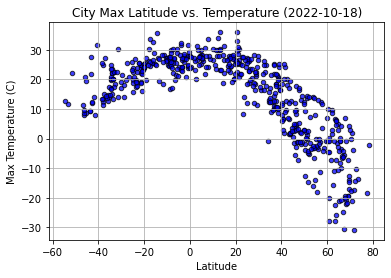

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],s=20,c='b',edgecolors='black',alpha=.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

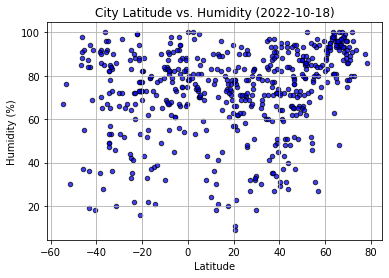

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],s=20,c='b',edgecolors='black',alpha=.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

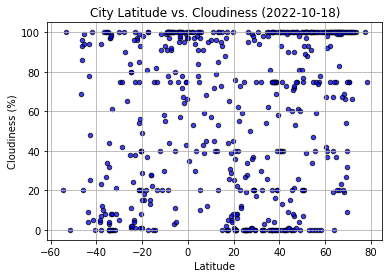

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],s=20,c='b',edgecolors='black',alpha=.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

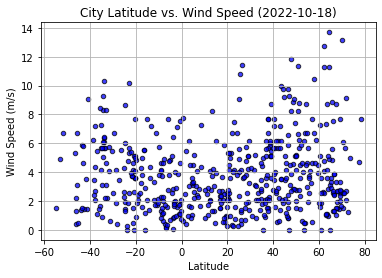

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],s=20,c='b',edgecolors='black',alpha=.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
north_df = city_data_df.loc[(city_data_df['Lat'] >= 0),:]
south_df = city_data_df.loc[(city_data_df['Lat'] < 0),:]

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(north_df)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port blair,11.6667,92.7500,28.02,78,40,1.03,IN,1667835451
4,pacific grove,36.6177,-121.9166,10.06,89,100,2.06,US,1667835452
5,torbay,47.6666,-52.7314,16.53,90,75,11.83,CA,1667835339
7,dvinskoy,62.1535,45.1175,1.53,95,100,4.08,RU,1667835453
8,butaritari,3.0707,172.7902,26.43,76,30,3.02,KI,1667835453


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(south_df)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,24.90,70,0,7.20,AR,1667835213
1,souillac,-20.5167,57.5167,24.21,73,40,3.60,MU,1667835451
2,cape town,-33.9258,18.4232,22.23,57,0,5.66,ZA,1667835346
6,waipawa,-41.4122,175.5153,8.00,92,5,1.44,NZ,1667835452
10,busselton,-33.6500,115.3333,13.54,84,99,5.69,AU,1667835454


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7389888895423294


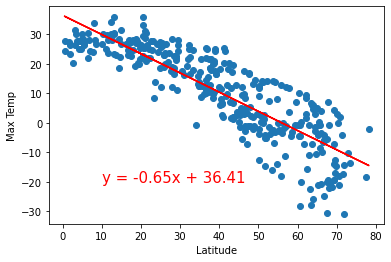

In [24]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig5.png")

plt.show()



The r-squared is: 0.44940103379233826


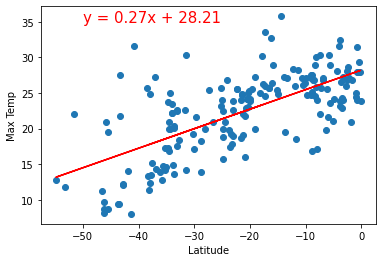

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig6.png")

plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12132877696440272


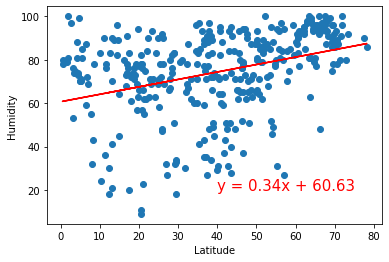

In [32]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig7.png")

plt.show()



The r-squared is: 0.015451028902472417


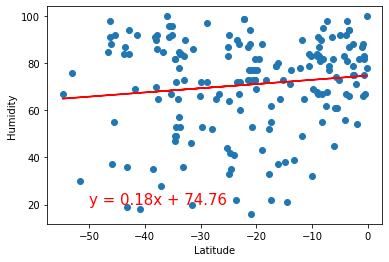

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig8.png")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05686811453634375


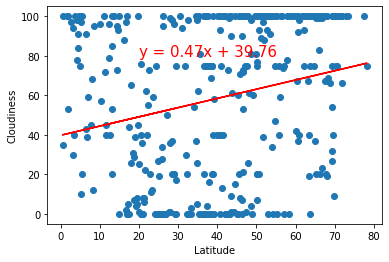

In [34]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig9.png")

plt.show()



The r-squared is: 0.11559368622006631


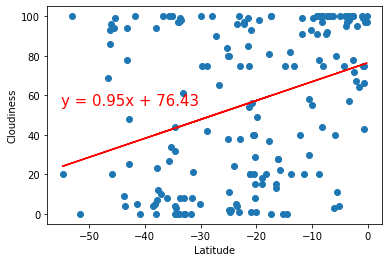

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig10.png")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03596106674751138


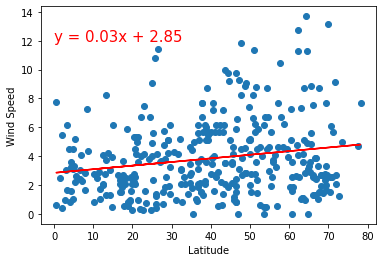

In [39]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig11.png")

plt.show()



The r-squared is: 0.061356152956147464


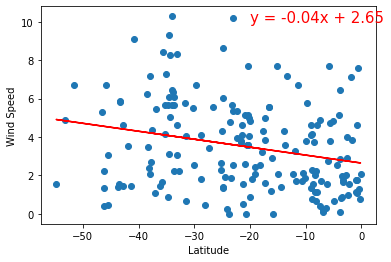

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig12.png")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE